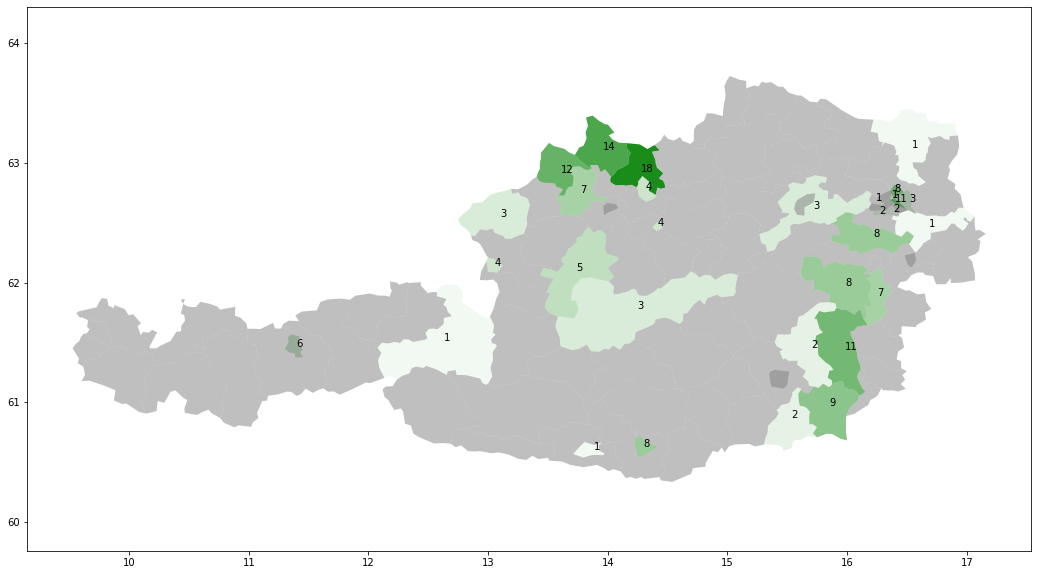

In [1]:
import json
import numpy as np
import os
import matplotlib.pyplot as plt

#Load and read the geojson file for Italys regions. 

#at_url = "https://github.com/ginseng666/GeoJSON-TopoJSON-Austria/blob/81df08cced08b02a873f6375e17424e053a99ac0/2021/simplified-99.9/bezirke_999_geo.json"
#with urllib.request.urlopen(at_url) as url:
        #jdata = json.loads(url.read().decode())
    
#           1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33
s_bricks = [201,202,303,304,313,315,316,320,321,401,402,404,407,408,413,414,416,501,506,602,610,612,617,622,623,701,902,910,914,920,921,922,923]
#          1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33
s_sales = [8,1,8,1,1,8,3,7,1,4, 4, 3, 5, 7, 14,12,18, 4, 1, 8, 2, 3, 2,11, 9, 6,11, 2, 1, 1, 8, 3, 2]
s_exclude = []  # prevent double brick lookup
    
# {'type': 'FeatureCollection', 'name': 'bezirke_999_geo', 'crs': 
# {'type': 'name', 'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}}, 'features': 
# [{'type': 'Feature', 'properties': {'iso': '322', 'name': 'Waidhofen an der Thaya'}, 'geometry': 
# {'type': 'MultiPolygon', 'coordinates': [[[[15.235486190707704, 48.75154503502358], [15.218308905888918, 

MY_PATH = r'C:\Users\User\Documents\DL\lrgtxt0'
os.chdir(MY_PATH)
with open('AT0.geojson', 'r', encoding='utf-8') as f:
    jdata = json.load(f)  # iso is the brick number

fig, axs = plt.subplots()
axs.set_aspect('equal', 'datalim')
fig.set_size_inches(18, 10)

pts = []  # list of points defining boundaries of polygons
for  feature in jdata['features']:
    #print(feature['properties']['iso'])  # brick
    if feature['geometry']['type'] == 'Polygon':
        pts.extend(feature['geometry']['coordinates'][0])      
    elif feature['geometry']['type'] == 'MultiPolygon':
        for polyg in feature['geometry']['coordinates']:
            x = [el[0] for el in polyg[0]]
            y = [el[1]*1.3 for el in polyg[0]]  # stretch into y a bit
            if int(feature['properties']['iso']) in s_bricks and not int(feature['properties']['iso']) in s_exclude:
                #print(feature['properties']['iso'], feature['properties']['name'])
                s_exclude.append(int(feature['properties']['iso']))
                if int(s_sales[s_bricks.index(int(feature['properties']['iso']))]) > 0:
                    axs.fill(x, y, "g", alpha=int(s_sales[s_bricks.index(int(feature['properties']['iso']))])/20)
                xt = sum(x) / len(x)  # find center of polygon
                yt = sum(y) / len(y)
                axs.annotate(s_sales[s_bricks.index(int(feature['properties']['iso']))], xy=(xt, yt))
            else:
                axs.fill(x, y, "grey", alpha=0.5)
    elif feature['geometry']['type'] == 'LineString': 
        pts.extend(feature['geometry']['coordinates'])
    else: pass           

plt.show()

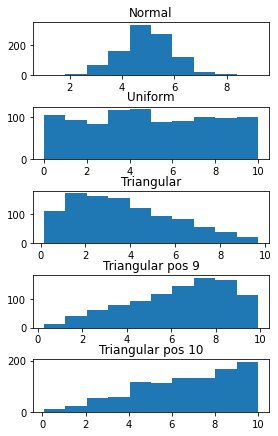

Distr   NPS,  CSAT
-------------------
normal -0.45, 2.50
uniform -0.12, 2.26
triangular neg -0.23, 1.84
triangular pos -0.02, 3.18
triangular pos 0.08, 3.33


In [2]:
# NPS sensitivity test
import random
import matplotlib.pyplot as plt
import numpy as np
import math

def nps(survey):
    '''NPS = %promotors(9 or 10) - %detractors(<=6), survey is a list of scores 0 to 10'''
    promotors = sum([s for s in survey if s > 8])
    detractors = sum([s for s in survey if s < 7])
    return (promotors - detractors) / len(survey)

def csat(survey):
    '''customer satisfaction from a 0-10 rating'''
    return sum(survey) / len(survey) / 2
  
Y1 = np.random.normal(5, 1, 1000)
#Y2 = np.random.multinomial(10, [0.2, 0.8], 1000)
Y3 = np.random.uniform(0, 10, 1000)
Y4 = np.random.triangular(0, 1, 10, 1000)
Y5 = np.random.triangular(0, 9, 10, 1000)
Y6 = np.random.triangular(0, 10, 10, 1000)

figure, axis = plt.subplots(5, 1, figsize=(4, 6))
figure.tight_layout()
  
# For Normal Function
axis[0].hist(Y1)
axis[0].set_title("Normal")
  
# For Uniform Function
axis[1].hist(Y3)
axis[1].set_title("Uniform")
  
# For Triangular Function - neg tilted
axis[2].hist(Y4)
axis[2].set_title("Triangular")

# For Triangular Function - pos tilted
axis[3].hist(Y5)
axis[3].set_title("Triangular pos 9")

# For Triangular Function - pos tilted
axis[4].hist(Y6)
axis[4].set_title("Triangular pos 10")

plt.show()

print(f"Distr   NPS,  CSAT")
print("-------------------")
npsa = 0
csata = 0
for i in range(1000):
    Y1 = np.random.normal(5, 1, 10)
    s = [int(round(n)) for n in Y1]
    npsa += nps(s)
    csata += csat(s)
print(f"normal {npsa / 10000 :3.2f}, {csata / 1000 :3.2f}")
npsa = 0
csata = 0
for i in range(1000):
    Y3 = np.random.uniform(0, 10, 10)
    s = [int(n) for n in Y3]
    npsa += nps(s)
    csata += csat(s)
print(f"uniform {npsa / 10000 :3.2f}, {csata / 1000 :3.2f}")
npsa = 0
csata = 0
for i in range(1000):
    Y4 = np.random.triangular(0, 1, 10, 10)
    s = [int(round(n)) for n in Y4]
    npsa += nps(s)
    csata += csat(s)
print(f"triangular neg {npsa / 10000 :3.2f}, {csata / 1000 :3.2f}")
npsa = 0
csata = 0
for i in range(1000):
    Y5 = np.random.triangular(0, 9, 10, 10)
    s = [int(round(n)) for n in Y5]
    npsa += nps(s)
    csata += csat(s)
print(f"triangular pos {npsa / 10000 :3.2f}, {csata / 1000 :3.2f}")
npsa = 0
csata = 0
for i in range(1000):
    Y6 = np.random.triangular(0, 10, 10, 10)
    s = [int(round(n)) for n in Y6]
    npsa += nps(s)
    csata += csat(s)
print(f"triangular pos {npsa / 10000 :3.2f}, {csata / 1000 :3.2f}")

In [2]:


def fact(n):
    res = 1
    for k in range(n):
        res *= (k+1)
    return res

print([fact(n+1) - fact(n) for n in range(10)])
print([fact(n)*n for n in range(10)])

[0, 1, 4, 18, 96, 600, 4320, 35280, 322560, 3265920]
[0, 1, 4, 18, 96, 600, 4320, 35280, 322560, 3265920]


In [19]:
import math

lp0 = [k%12 for k in range(12)]
lp0.sort()
print(f"original group: {lp0}")

for d in range(12):
    if math.gcd(12,d+1) > 1:
        lp = [((d+1)*k)%12 for k in range(12)]
        lp.sort()
        #print(set(lp))
        lp0 = [l for l in lp0 if l not in lp]
        
print(f"after removing all subgroups generated by factors: {lp0}")

original group: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
after removing all subgroups generated by factors: [1, 5, 7, 11]


In [1]:
# Rakki maths II
import random

def sample_div(n=3, m=2):
    a = random.randint(10**(n-1), 10**n)
    b = random.randint(10**(m-1), 10**m) - 1
    b = max(2, b)
    return (a, b, a//b, a % b)

def sample_mult(n=3, m=3):
    a = random.randint(10**(n-1), 10**n)
    b = random.randint(10**(m-1), 10**m)
    return (a, b, a*b)

for i in range(3):
    problem = sample_div()
    print(f"{problem[0]} : {problem[1]} = {problem[2]}, R {problem[3]}")
for i in range(3):
    problem = sample_mult()
    print(f"{problem[0]} * {problem[1]} = {problem[2]}")

296 : 12 = 24, R 8
184 : 14 = 13, R 2
725 : 99 = 7, R 32
387 * 641 = 248067
411 * 645 = 265095
357 * 531 = 189567


In [22]:
# Secretary problem = optimal stopping
# x -> (r-1)/n   t -> (i-1)/n
# P(x) = -xlnx
import math

x = (5-1)/10
-x * math.log(x)

0.366516292749662

In [1]:
# Python3 Program to test 1/e law for
# Secretary Problem
import random
import math
   
e = 2.71828;
   
# To find closest integer of num.
def roundNo(num):
    if(num < 0):
        return (num - 0.5)
    else:
        return (num + 0.5);
   
# Finds best candidate using n/e rule.
# candidate[] represents talents of n candidates.
def printBestCandidate(candidate, n):
       
    # Calculating sample size for benchmarking.
    sample_size = roundNo(n / e);
    print("\n\nSample size is",
           math.floor(sample_size));
   
    # Finding best candidate in sample size
    best = 0;
    for i in range(1, int(sample_size)):
        if (candidate[i] > candidate[best]):
            best = i;
   
    # Finding the first best candidate that
    # is better than benchmark set.
    for i in range(int(sample_size), n):
        if (candidate[i] >= candidate[best]):
            best = i;
            break;
   
    if (best >= int(sample_size)):
        print("\nBest candidate found is",
                     math.floor(best + 1),
              "with talent", math.floor(candidate[best]));
    else:
        print("Couldn't find a best candidate");
   
# Driver code
n = 8;
   
# n = 8 candidates and candidate
# array contains talents of n
# candidate where the largest
# number means highest talented
# candidate.
candidate = [0] * (n);
   
# generating random numbers between 1 to 8
# for talent of candidate
for i in range(n):
    candidate[i] = 1 + random.randint(1, 8);
print("Candidate : ", end = "");
   
for i in range(n):
    print((i + 1), end = " ");
print("\nTalents : ", end = "");
   
for i in range(n):
    print(candidate[i], end = " ");
    
printBestCandidate(candidate, n);
   
# This code is contributed by mits

Candidate : 1 2 3 4 5 6 7 8 
Talents : 3 2 7 5 7 7 7 3 

Sample size is 3

Best candidate found is 5 with talent 7


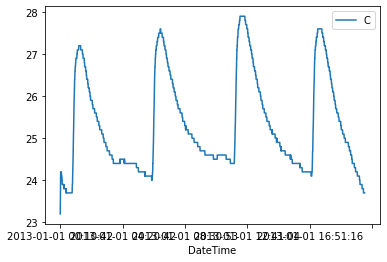

[ 155  803 1460 2080]
[27.2, 27.6, 27.9, 27.6]


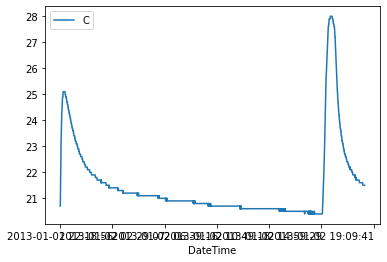

[  36 2594]
[25.1, 28.0]


In [4]:
import pandas
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks


MY_PATH = r'C:\Users\User\Desktop\OptTherme'
os.chdir(MY_PATH)

df = pandas.read_csv(r'UNT330A_20220809_070516.log.csv')
#print(df)
df.plot(x="DateTime", y=["C"])
plt.show()

peaks, _ = find_peaks(df["C"], height=(26, 29), distance = 150)  # height: choose peaks in this range; distance = between points
print(peaks)
print([df["C"][p] for p in peaks])

df = pandas.read_csv(r'UNT330A_20220810_091139.log.csv')
#print(df)
df.plot(x="DateTime", y=["C"])
plt.show()

peaks, _ = find_peaks(df["C"], height=(23, 29), distance = 150)  # height: choose peaks in this range; distance = between points
print(peaks)
print([df["C"][p] for p in peaks])


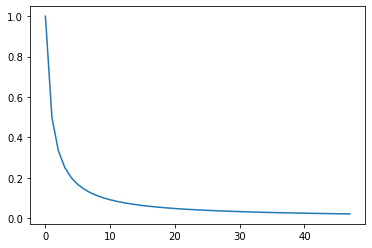

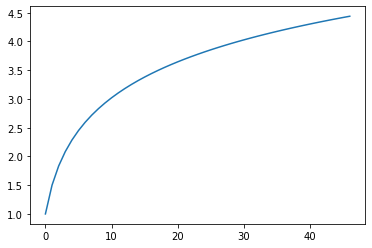

In [8]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot([1/(i-1) for i in range(2, 50)])
plt.show()

plt.plot([sum([1/(i-1) for i in range(2, n)]) for n in range(3,50)])
plt.show()

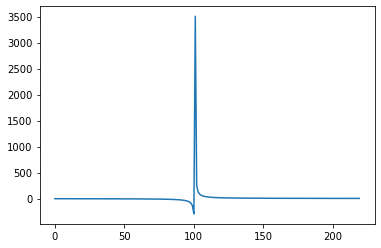

In [23]:
import numpy as np
import matplotlib.pyplot as plt

k = 0.1  # 0.12 to 0.23
a = 0.0008  # 0.000167 to 0.000805
t0 = 29
t1 = 22

def f(tc):
    return t0*(1-np.exp(-a*tc))-t1

plt.plot([f(tc)**2/(tc + f(tc)/k) for tc in range(80, 300)])
plt.show()

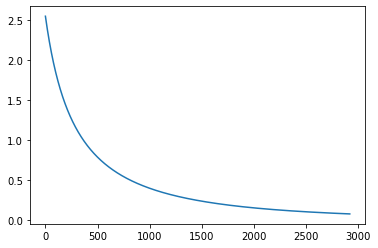

In [1]:
import numpy as np
import matplotlib.pyplot as plt

k = 0.13  # 0.149 to 0.23
a = 0.0002  # 0.000167 to 0.000385
t0 = 27.6
t1 = 24

def fc(tc):
    return t0*np.exp(-a*tc)

plt.plot([fc(tc)**2/(tc + fc(tc)/k) for tc in range(80, 3000)])
plt.show()

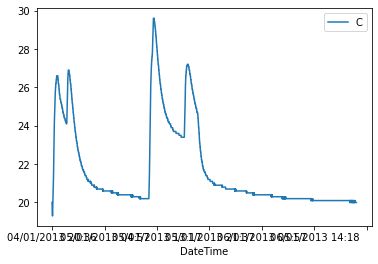

[  99  316 1938 2585]
[26.6, 26.9, 29.6, 27.2]


In [6]:
import pandas
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks


MY_PATH = r'C:\Users\User\Desktop\OptTherme'
os.chdir(MY_PATH)

df = pandas.read_csv(r'UNT330A_20220818_111727.log.csv')
#print(df)
df.plot(x="DateTime", y=["C"])
plt.show()

peaks, _ = find_peaks(df["C"], height=(24, 30), distance = 100)  # height: choose peaks in this range; distance = between points
print(peaks)
print([df["C"][p] for p in peaks])

In [2]:
import math

t0 = 27.2
t1 = 20.0
dt = 1608

(math.log(t0) - math.log(t1)) / dt

0.000191221828201468

In [7]:
import math

def Hn(x):
    return (1/(1-x)*math.log(1/(1-x)))

[Hn(x/11) for x in range(10)]

[0.0,
 0.10484119778475744,
 0.2452641833426293,
 0.4378738802879851,
 0.7102623373105185,
 1.1112489732122453,
 1.7346061928013938,
 2.7819025071158197,
 4.764037608477624,
 9.376114507311343]